In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [2]:
X = np.array([
    0.173, 0.518, 0.864, 1.209, 1.555, 1.901, 2.246, 2.592, 2.937
])
Y = np.array([
    1.547, 0.852, 0.063, -0.47, -0.75, -1.142, -1.052, -1.188, -0.962
])

### Отображение точек и моделирование ситуации

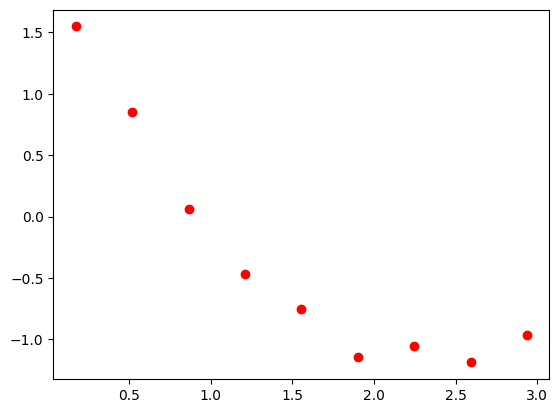

In [4]:
plt.scatter(X, Y, color = 'red')

Отберем следующие функции:
1. $y = be^{ax} + c$ ($3$ параметра, $m = 3$);
2. $y = ax^2 + bx + c$ ($3$ параметра, $m = 3$).

### Составление системы и МНК

#### Первый закон

В первый закон параметр $a$ входит нелинейно, поэтому мы не можем сразу составить нормальную систему. Преобразуем закон. Пусть $c = c_0 = -1.5$, тогда:
$$
y - c_0 = be^ax \\
\ln{y - c_0} = \ln{be^{ax}} \\
\ln{y - c_0} = \ln{b} + ax\ln{e} \\
\ln{y - c_0} = ax + \ln{b}
$$

Делаем замену: $\ln{y - c_0} = z(x)$, тогда исходный закон будет иметь вид: $z = ax + \ln{b}$.

Теперь нормальная система параметров $a$ и $\ln{b}$ будет состоять из двух уравнений и иметь вид.

$\varphi_1(x) = x$, $\varphi_2(x) = 1$

$\begin{cases}
a \displaystyle\sum_{i=1}^{n} \varphi_1(x_i)\varphi_1(x_i) + \ln{b} \displaystyle\sum_{i=1}^{n} \varphi_1(x_i)\varphi_2(x_i) = \displaystyle\sum_{i=1}^{n} z_i \varphi_1(x_i) \\
a \displaystyle\sum_{i=1}^{n} \varphi_2(x_i)\varphi_1(x_i) + \ln{b} \displaystyle\sum_{i=1}^{n} \varphi_2(x_i)\varphi_2(x_i) = \displaystyle\sum_{i=1}^{n} z_i \varphi_2(x_i)
\end{cases}$ ;


$\begin{cases}
a \displaystyle\sum_{i=1}^{n} x_i^2 + \ln{b} \displaystyle\sum_{i=1}^{n} x_i = \displaystyle\sum_{i=1}^{n} ({\ln{y_i - c_0}}){x_i} \\
a \displaystyle\sum_{i=1}^{n} x_i + n\ln{b} = \displaystyle\sum_{i=1}^{n} ln(y_i - c_0)
\end{cases}$ ;

In [27]:
c0 = -1.5
res = np.linalg.solve(
    np.array([
        [np.sum(X ** 2), np.sum(X)],
        [np.sum(X), len(X)]
    ]),
    np.array([
        np.sum((np.log(Y - c0)) * X), np.sum(np.log(Y - c0))
    ])
)

In [28]:
res[1] = np.exp(res[1])
res

array([-0.79837211,  2.94346656])

In [29]:
f = lambda x: res[1] * np.exp(res[0] * x) + c0

In [30]:
delta1 = np.sqrt(
    np.sum((f(X) - Y) ** 2)
)
delta1

0.7596772405555379

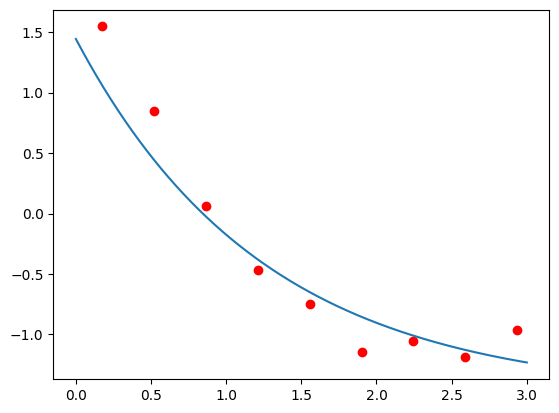

In [31]:
x = np.linspace(0, 3, 1000)
y = f(x)
plt.scatter(X, Y, color = 'red');
plt.plot(x, y);

#### Второй закон

Для второго закона имеем: $m = 3$, $\varphi_1(x) = x^2$, $\varphi_2(x) = x$, $\varphi_3(x) = 1$. Система примет следующий вид:

$\begin{cases}
a \displaystyle\sum_{i=1}^{n} \varphi_1(x_i)\varphi_1(x_i) + b \displaystyle\sum_{i=1}^{n} \varphi_1(x_i)\varphi_2(x_i) + с \displaystyle\sum_{i=1}^{n} \varphi_1(x_i)\varphi_3(x_i) = \displaystyle\sum_{i=1}^{n} y_i \varphi_1(x_i) \\
a \displaystyle\sum_{i=1}^{n} \varphi_2(x_i)\varphi_1(x_i) + b \displaystyle\sum_{i=1}^{n} \varphi_2(x_i)\varphi_2(x_i) + с \displaystyle\sum_{i=1}^{n} \varphi_2(x_i)\varphi_3(x_i) = \displaystyle\sum_{i=1}^{n} y_i \varphi_2(x_i) \\
a \displaystyle\sum_{i=1}^{n} \varphi_3(x_i)\varphi_1(x_i) + b \displaystyle\sum_{i=1}^{n} \varphi_3(x_i)\varphi_2(x_i) + с \displaystyle\sum_{i=1}^{n} \varphi_3(x_i)\varphi_3(x_i) = \displaystyle\sum_{i=1}^{n} y_i \varphi_3(x_i) \\
\end{cases}$ ;

$\begin{cases}
a \displaystyle\sum_{i=1}^{n} x_i^4 + b \displaystyle\sum_{i=1}^{n} x_i^3 + с \displaystyle\sum_{i=1}^{n} x_i^2 = \displaystyle\sum_{i=1}^{n} y_i x_i^2 \\
a \displaystyle\sum_{i=1}^{n} x_i^3 + b \displaystyle\sum_{i=1}^{n} x_i^2 + с \displaystyle\sum_{i=1}^{n} x_i = \displaystyle\sum_{i=1}^{n} y_i x_i \\
a \displaystyle\sum_{i=1}^{n} x_i^2 + b \displaystyle\sum_{i=1}^{n} x_i + сn = \displaystyle\sum_{i=1}^{n} y_i \\
\end{cases}$ ;

In [37]:
res = np.linalg.solve(
    np.array([
        [np.sum(X ** 4), np.sum(X ** 3), np.sum(X ** 2)],
        [np.sum(X ** 3), np.sum(X ** 2), np.sum(X ** 1)],
        [np.sum(X ** 2), np.sum(X ** 1), len(X)],
    ]),
    np.array([
        np.sum(Y * X ** 2), np.sum(Y * X ** 1), np.sum(Y)
    ])
)

In [38]:
res

array([ 0.58334587, -2.73338407,  2.03079384])

In [39]:
f = lambda x: res[0] * x ** 2 + res[1] * x + res[2]

In [40]:
delta2 = np.sqrt(
    np.sum((f(X) - Y) ** 2)
)
delta2

0.19449616196559796

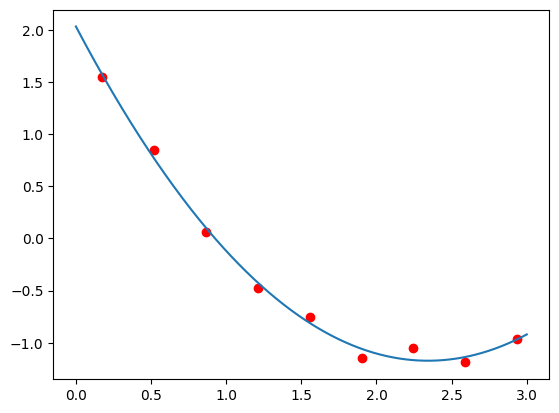

In [41]:
y = f(x)
plt.scatter(X, Y, color = 'red');
plt.plot(x, y);